Some imports...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os

In [48]:
def time_vs_processes_plot(name_csv_file):

    data = pd.read_csv(name_csv_file, header=0)
    data['log2size'] = np.log2(data['Size'])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    norm = Normalize(vmin=data['log2size'].min(), vmax=data['log2size'].max())

    for log2size in data['log2size'].unique():
        ax.plot(
            data[data['log2size'] == log2size]['Processes'],
            data[data['log2size'] == log2size]['Latency'],
            '-o',
            label = f'log2size = {log2size}',
            color = plt.cm.viridis(norm(log2size))
        )

    title = name_csv_file.rsplit('/', 1)[
    ax.set_title(title)
    ax.set_xlabel('Number of processes')
    ax.set_ylabel('Time (seconds)')
    
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('log2(Size)')
    cbar.set_ticks(data['log2size'].unique())
    cbar.set_ticklabels(data['log2size'].unique())
    
    plt.show()
    # save the plot
    fig.savefig(f'plots/{title}.png')


In [30]:
def time_vs_logsize_vs_loglat(csv_filename, title):
    #function to plot a 3d curve of time vs size vs loglatency
    data = pd.read_csv(csv_filename, header=0)
    data['logSize'] = np.log2(data['Size'])
    data['logLatency'] = np.log2(data['Latency'])
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(data['Processes'], data['logSize'], data['logLatency'], cmap='viridis')
    ax.set_xlabel('Processes')
    ax.set_ylabel('log2(Size)')
    ax.set_zlabel('log2(Latency)', labelpad=-30)
    ax.set_xlim(0, data['Processes'].max())
    ax.set_ylim(0, data['logSize'].max())
    ax.set_zlim(data['logLatency'].min(), data['logLatency'].max())
    ax.set_title(title)
    plt.show()


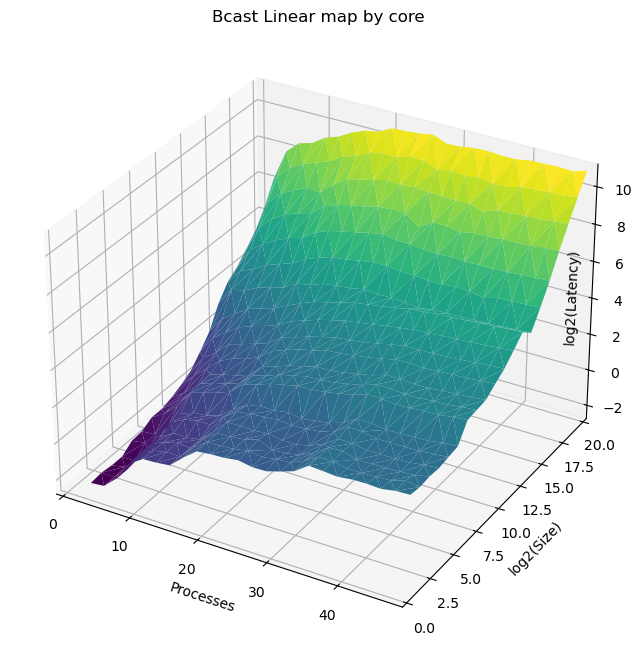

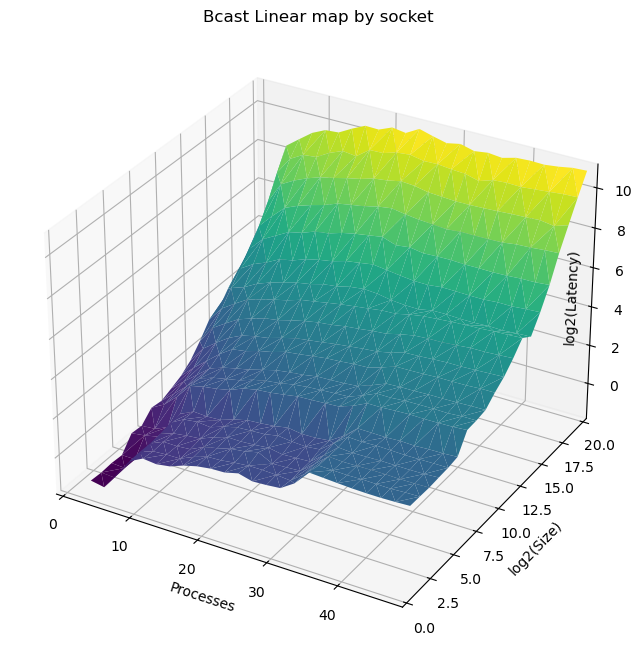

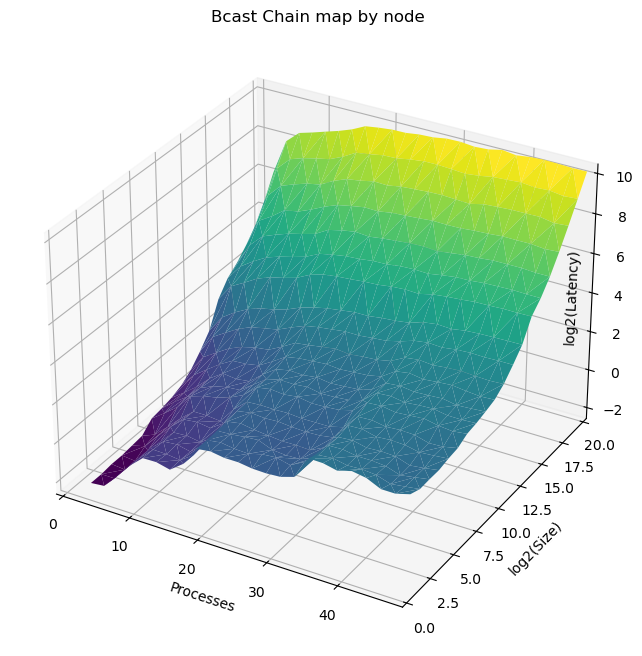

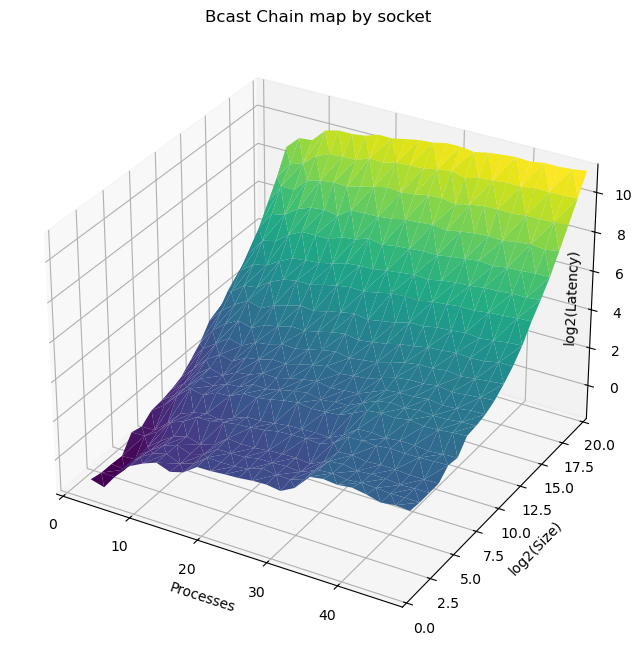

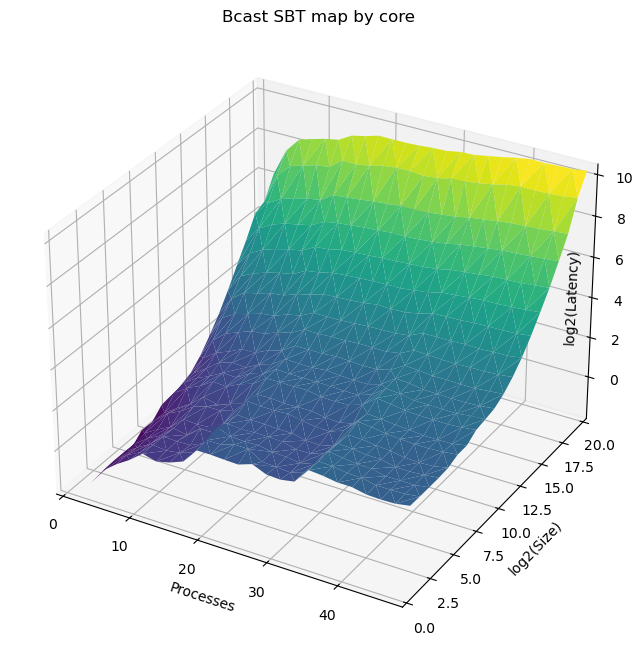

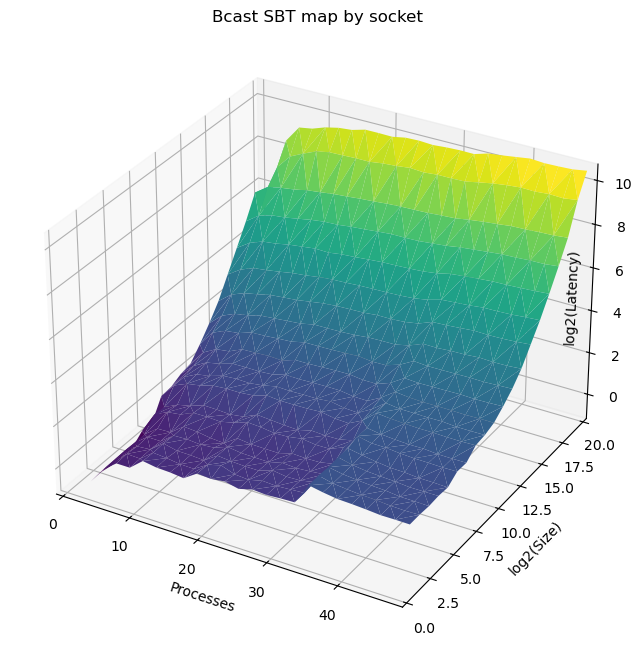

In [32]:
time_vs_logsize_vs_loglat('bcast/bcast1_core_thin.csv', 'Bcast Linear map by core')
time_vs_logsize_vs_loglat('bcast/bcast1_socket_thin.csv', 'Bcast Linear map by socket')
time_vs_logsize_vs_loglat('bcast/bcast2_core_thin.csv', 'Bcast Chain map by node')
time_vs_logsize_vs_loglat('bcast/bcast2_socket_thin.csv', 'Bcast Chain map by socket')
time_vs_logsize_vs_loglat('bcast/bcast4_core_thin.csv', 'Bcast SBT map by core')
time_vs_logsize_vs_loglat('bcast/bcast4_socket_thin.csv', 'Bcast SBT map by socket')

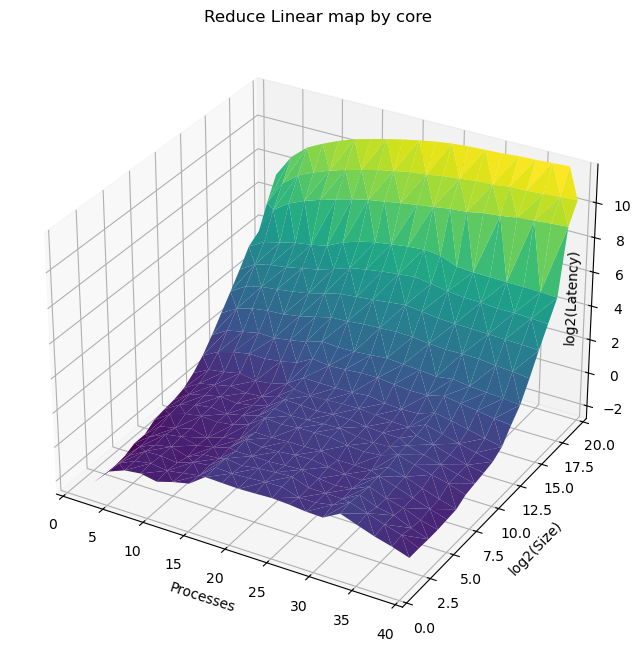

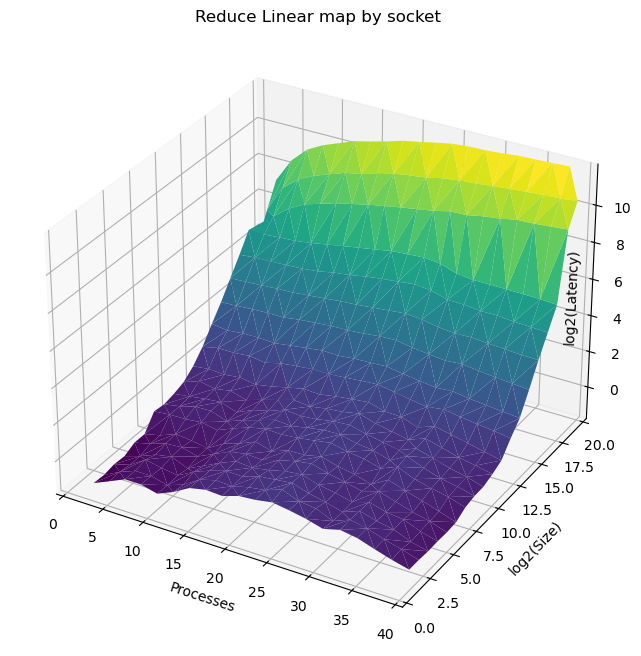

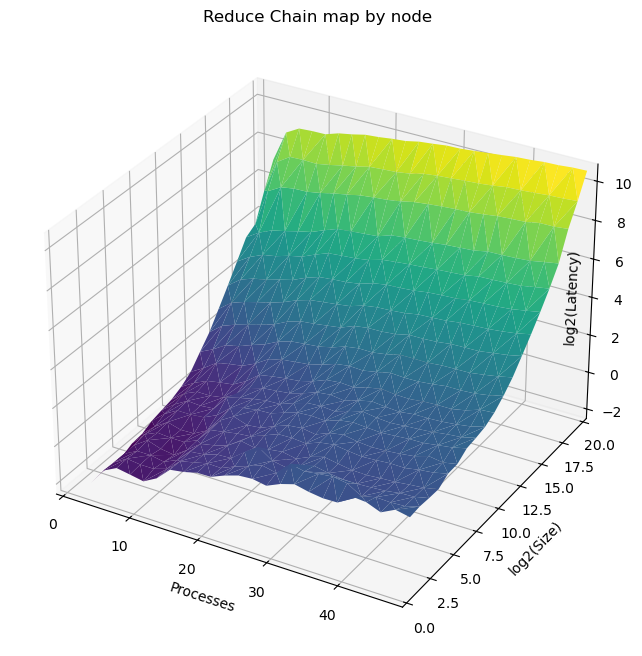

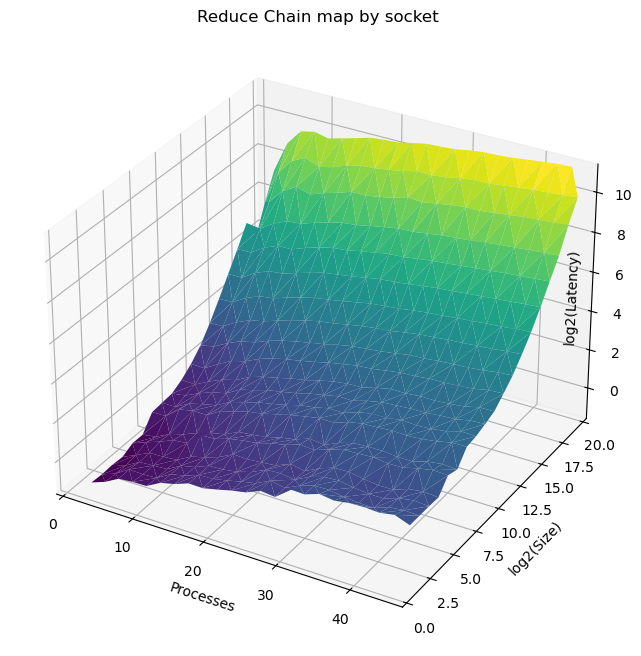

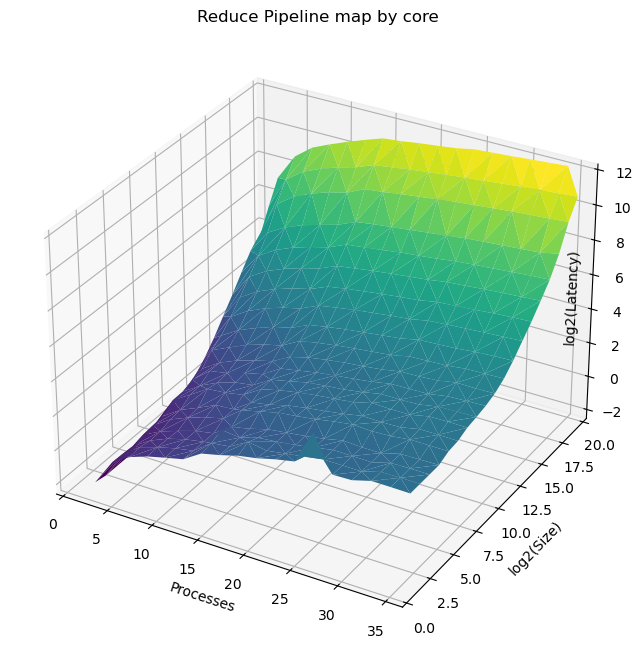

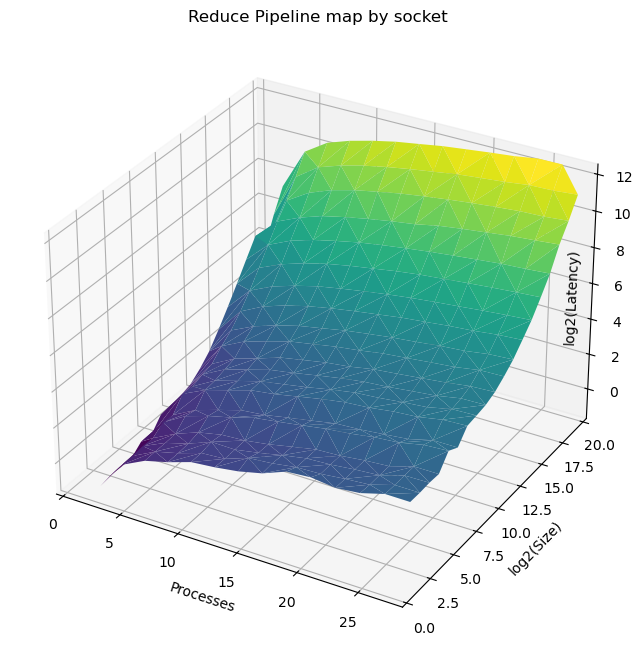

In [31]:
time_vs_logsize_vs_loglat('reduce/reduce1_core_thin.csv', 'Reduce Linear map by core')
time_vs_logsize_vs_loglat('reduce/reduce1_socket_thin.csv', 'Reduce Linear map by socket')
time_vs_logsize_vs_loglat('reduce/reduce2_core_thin.csv', 'Reduce Chain map by node')
time_vs_logsize_vs_loglat('reduce/reduce2_socket_thin.csv', 'Reduce Chain map by socket')
time_vs_logsize_vs_loglat('reduce/reduce3_core_thin.csv', 'Reduce Pipeline map by core')
time_vs_logsize_vs_loglat('reduce/reduce3_socket_thin.csv', 'Reduce Pipeline map by socket')